# Classification analysis description

The classification analysis aims to compare the methods' usability in a vertex classification task.

## Graphs
We conducted the analysis on the following graphs:

* the Internet Industry Partnerships graph from the Network Repository. The graph has 3 classes of the following sizes - 42, 44, 133.
* the Zachary's Karate Club graph from the graphs module, consisting of 2 classes of 17 nodes.
* the cluster graph, having 3 classes of the following sizes - 118, 86, 96, cluster density 0.5, and outer density 0.05.

## Embedding methods

To compare the methods’ performance in the classification tasks, we embed the graphs and usethe subset of the resulting representation as training data for the Logistic Regression Classifier. The GCN method is omitted, as the resulting matrix is already an answer toa classification task instead of a proper data representation.


# Setup

In [1]:
import relegy.embeddings as rle
import relegy.metrics as rlm
import relegy.graphs as rlr

In [2]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
import inspect
from IPython.display import clear_output
from matplotlib.pylab import rcParams
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from tqdm.notebook import tqdm

In [3]:
def get_embedding_methods_iterable():
    """
    Iterates over embedding methods.
    """
    return filter(lambda x: x[0][:2] != "__", inspect.getmembers(sys.modules['relegy.embeddings']))

def plot_graph(graph):
    """
    Draws the graph.
    """
    rcParams["figure.figsize"] = 5,5
    nx.draw(graph[0], node_color=graph[1])

def get_results_from_all_viable_methods(d, graphs, graph_names=None, labels=None):
    """
    Generates the embeddings for the graphs.
    """
    results = [None] * len(graphs)
    for i, G in tqdm(enumerate(graphs)):
        results_dictionary = {}
        for name, class_handle in get_embedding_methods_iterable():
            info = "Currently processing " + str(name) + ", d: " + str(d)
            if graph_names is not None:
                info += ", graph: " + graph_names[i]
            if not (name == "GCN"):
                if name in ["GraphWave", "HOPE", "LINE"]:
                    current_d = d // 2
                else:
                    current_d = d
                print(info)
                if name == "GNN":
                    labelsGNN = np.array([np.arange(len(labels[i])),labels[i]]).T
                    results_dictionary[name] = class_handle.fast_embed(G, embed_dim=current_d, idx_labels=labelsGNN)
                    clear_output()
                elif not (name == "HARP"):
                    results_dictionary[name] = class_handle.fast_embed(G, d=current_d)
                    clear_output()
                else:
                    temp_name = "HARP_Deepwalk"
                    results_dictionary[temp_name] = class_handle.fast_embed(G, d=current_d)
                    temp_name = "HARP_Node2Vec"
                    results_dictionary[temp_name] = class_handle.fast_embed(G, d=current_d, method = "Node2Vec")
                    clear_output()
        results[i] = results_dictionary
    return results

# Analysis

## Graphs

In [4]:
#Graphs reading and generation
node_labels = np.genfromtxt(os.path.join("..","data","internet-industry-partnerships","internet-industry-partnerships.node_labels"))
edges = np.genfromtxt(os.path.join("..","data","internet-industry-partnerships","internet-industry-partnerships.edges"), delimiter=",").astype(int)
labels1 = node_labels.astype(int)
G1 = nx.Graph()
G1.add_edges_from(edges)
G1 = nx.convert_node_labels_to_integers(G1, first_label=0)

G2, labels2_ = rlr.get_karate_graph()
labels2_ = np.array(labels2_)[:, 1]
labels2 = (labels2_ == 'Mr. Hi').astype(int)

G3, labels3 = rlr.generate_clusters_graph(300, 3, 0.05, 0.5)

labels = [labels1, labels2, labels3]

## Input data presentation

In [5]:
#Labels of Internet Industry Partnerships
np.unique(labels1, return_counts=True)
#(array([1, 2, 3]), array([ 42, 133,  44], dtype=int64))

(array([1, 2, 3]), array([ 42, 133,  44], dtype=int64))

In [6]:
#Labels of Zacahary's Karate Club
np.unique(labels2, return_counts=True)

(array([0, 1]), array([17, 17], dtype=int64))

In [7]:
#Labels of the cluster graph
np.unique(labels3, return_counts=True)

(array([0, 1, 2]), array([114,  95,  91], dtype=int64))

### G1 - Internet Industry Partnerships

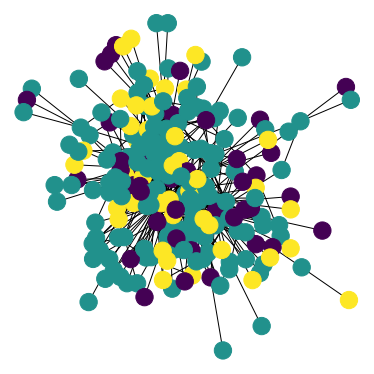

In [4]:
plot_graph((G1, labels1))
#plt.savefig("Classification/Classification-G1.png", transparent=True)

### G2

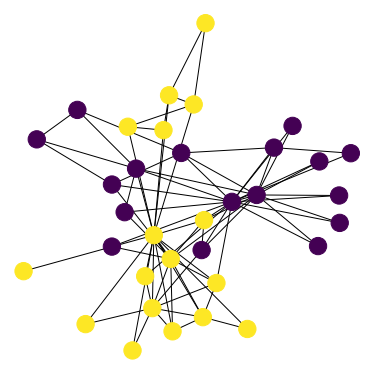

In [5]:
plot_graph((G2, labels2))
#plt.savefig("Classification/Classification-G2.png", transparent=True)

### G3

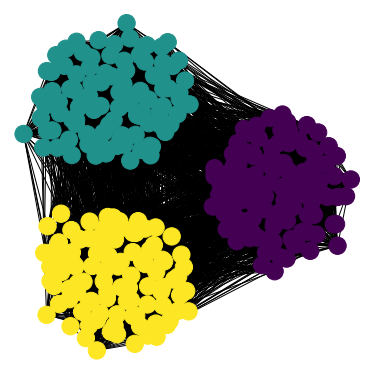

In [6]:
plot_graph((G3, labels3))
#plt.savefig("Classification/Classification-G3.png", transparent=True)

## Embeddings computation

In [11]:
# results_d2 = get_results_from_all_viable_methods(d=2, graphs=[G1, G2, G3], graph_names=["G1", "G2", "G3"], labels=labels)
# results_d6 = get_results_from_all_viable_methods(d=6, graphs=[G1, G2, G3], graph_names=["G1", "G2", "G3"], labels=labels)
# results_d20 = get_results_from_all_viable_methods(d=20, graphs=[G1, G2, G3], graph_names=["G1", "G2", "G3"], labels=labels)
# with open(f"Classification/G1_results_d2.p", "wb") as f:
#     pickle.dump(results_d2[0], f)

# with open(f"Classification/G1_results_d6.p", "wb") as f:
#     pickle.dump(results_d6[0], f)

# with open(f"Classification/G1_results_d20.p", "wb") as f:
#     pickle.dump(results_d20[0], f)

# with open(f"Classification/G2_results_d2.p", "wb") as f:
#     pickle.dump(results_d2[1], f)

# with open(f"Classification/G2_results_d6.p", "wb") as f:
#     pickle.dump(results_d6[1], f)

# with open(f"Classification/G2_results_d20.p", "wb") as f:
#     pickle.dump(results_d20[1], f)

# with open(f"Classification/G3_results_d2.p", "wb") as f:
#     pickle.dump(results_d2[2], f)

# with open(f"Classification/G3_results_d6.p", "wb") as f:
#     pickle.dump(results_d6[2], f)

# with open(f"Classification/G3_results_d20.p", "wb") as f:
#     pickle.dump(results_d20[2], f)

In [18]:
#Loads generated embeddings from pickle files
embeddings_d2 = {}
for i in range(1, 4):
    with open(f"Classification/G{i}_results_d2.p", mode="rb") as f:
        embeddings_d2["G"+str(i)] = pickle.load(f)
embeddings_d6 = {}
for i in range(1, 4):
    with open(f"Classification/G{i}_results_d6.p", mode="rb") as f:
        embeddings_d6["G"+str(i)] = pickle.load(f)
embeddings_d20 = {}
for i in range(1, 4):
    with open(f"Classification/G{i}_results_d20.p", mode="rb") as f:
        embeddings_d20["G"+str(i)] = pickle.load(f)

## Logistic regression

In [19]:
#Calculates logistic regression accuracy for 2-dimensional embeddings
reg_results_train_d2 = {"G1": {}, "G2":{}, "G3":{}}
reg_results_test_d2 = {"G1": {}, "G2":{}, "G3":{}}
for j in range(1, 4):
    names = embeddings_d2['G'+str(j)].keys()
    labels_cur = labels[j-1]
    reg_results = {}
    for i, name in enumerate(names):
        Z = embeddings_d2['G'+str(j)][name]
        X_train, X_test, y_train, y_test = train_test_split(Z, labels_cur, random_state=0)
        logreg = LogisticRegression(max_iter=400)
        logreg.fit(X_train, y_train)
        reg_results_train_d2["G"+str(j)][name] = logreg.score(X_train, y_train)
        reg_results_test_d2["G"+str(j)][name] = logreg.score(X_test, y_test)

In [20]:
#Calculates logistic regression accuracy for 6-dimensional embeddings
reg_results_train_d6 = {"G1": {}, "G2":{}, "G3":{}}
reg_results_test_d6 = {"G1": {}, "G2":{}, "G3":{}}
for j in range(1, 4):
    names = embeddings_d6['G'+str(j)].keys()
    labels_cur = labels[j-1]
    reg_results = {}
    for i, name in enumerate(names):
        Z = embeddings_d6['G'+str(j)][name]
        X_train, X_test, y_train, y_test = train_test_split(Z, labels_cur, random_state=0)
        logreg = LogisticRegression(max_iter=1000)
        logreg.fit(X_train, y_train)
        reg_results_train_d6["G"+str(j)][name] = logreg.score(X_train, y_train)
        reg_results_test_d6["G"+str(j)][name] = logreg.score(X_test, y_test)

In [21]:
#Calculates logistic regression accuracy for 20-dimensional embeddings
reg_results_train_d20 = {"G1": {}, "G2":{}, "G3":{}}
reg_results_test_d20 = {"G1": {}, "G2":{}, "G3":{}}
for j in range(1, 4):
    names = embeddings_d20['G'+str(j)].keys()
    labels_cur = labels[j-1]
    reg_results = {}
    for i, name in enumerate(names):
        Z = embeddings_d20['G'+str(j)][name]
        X_train, X_test, y_train, y_test = train_test_split(Z, labels_cur, random_state=0)
        logreg = LogisticRegression(max_iter=800)
        logreg.fit(X_train, y_train)
        reg_results_train_d20["G"+str(j)][name] = logreg.score(X_train, y_train)
        reg_results_test_d20["G"+str(j)][name] = logreg.score(X_test, y_test)

/usr/local/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
G1_res_d2 = np.array(list(reg_results_test_d2["G1"].items()))
G2_res_d2 = np.array(list(reg_results_test_d2["G2"].items()))
G3_res_d2 = np.array(list(reg_results_test_d2["G3"].items()))

In [23]:
G1_res_d6 = np.array(list(reg_results_test_d6["G1"].items()))
G2_res_d6 = np.array(list(reg_results_test_d6["G2"].items()))
G3_res_d6 = np.array(list(reg_results_test_d6["G3"].items()))

In [24]:
G1_res_d20 = np.array(list(reg_results_test_d20["G1"].items()))
G2_res_d20 = np.array(list(reg_results_test_d20["G2"].items()))
G3_res_d20 = np.array(list(reg_results_test_d20["G3"].items()))

## Results

### All in one visualization

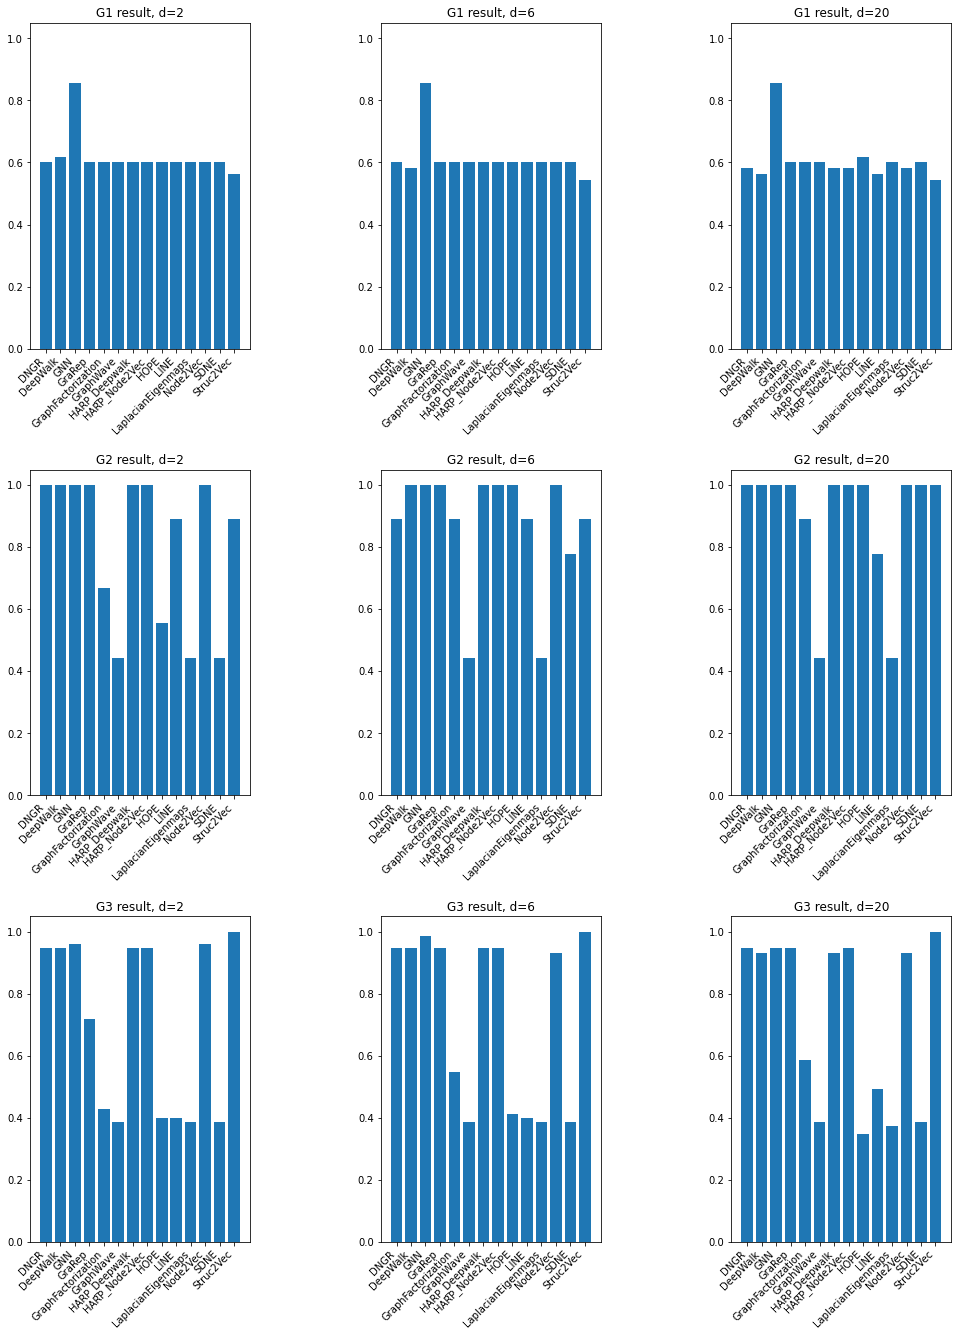

In [25]:
from matplotlib.pylab import rcParams
rcParams["figure.figsize"] = 16, 20
fig, axs = plt.subplots(3, 3)
fig.tight_layout(pad=10.0)
plt.setp(axs[0, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[0, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[0, 2].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[1, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[1, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[1, 2].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[2, 0].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[2, 1].xaxis.get_majorticklabels(), rotation=45, ha='right')
plt.setp(axs[2, 2].xaxis.get_majorticklabels(), rotation=45, ha='right')
axs[0, 0].set_ylim(0,1.05)
axs[0, 1].set_ylim(0,1.05)
axs[0, 2].set_ylim(0,1.05)
axs[1, 0].set_ylim(0,1.05)
axs[1, 1].set_ylim(0,1.05)
axs[1, 2].set_ylim(0,1.05)
axs[2, 0].set_ylim(0,1.05)
axs[2, 1].set_ylim(0,1.05)
axs[2, 2].set_ylim(0,1.05)
axs[0, 0].set_title("G1 result, d=2")
axs[0, 0].bar(G1_res_d2[:, 0], np.round(G1_res_d2[:, 1].astype(np.float32), 3))
axs[1, 0].set_title("G2 result, d=2")
axs[1, 0].bar(G2_res_d2[:, 0], np.round(G2_res_d2[:, 1].astype(np.float32), 3))
axs[2, 0].set_title("G3 result, d=2")
axs[2, 0].bar(G3_res_d2[:, 0], np.round(G3_res_d2[:, 1].astype(np.float32), 3))
axs[0, 1].set_title("G1 result, d=6")
axs[0, 1].bar(G1_res_d6[:, 0], np.round(G1_res_d6[:, 1].astype(np.float32), 3))
axs[1, 1].set_title("G2 result, d=6")
axs[1, 1].bar(G2_res_d6[:, 0], np.round(G2_res_d6[:, 1].astype(np.float32), 3))
axs[2, 1].set_title("G3 result, d=6")
axs[2, 1].bar(G3_res_d6[:, 0], np.round(G3_res_d6[:, 1].astype(np.float32), 3))
axs[0, 2].set_title("G1 result, d=20")
axs[0, 2].bar(G1_res_d20[:, 0], np.round(G1_res_d20[:, 1].astype(np.float32), 3))
axs[1, 2].set_title("G2 result, d=20")
axs[1, 2].bar(G2_res_d20[:, 0], np.round(G2_res_d20[:, 1].astype(np.float32), 3))
axs[2, 2].set_title("G3 result, d=20")
axs[2, 2].bar(G3_res_d20[:, 0], np.round(G3_res_d20[:, 1].astype(np.float32), 3))
plt.show()

### Visualizations for separate files

In [1]:
# rcParams["figure.figsize"] = 8, 8
# G_results = [[G1_res_d2,G1_res_d6,G1_res_d20],[G2_res_d2,G2_res_d6,G2_res_d20],[G3_res_d2,G3_res_d6,G3_res_d20]]
# G_names = ["G1","G2","G3"]
# d_vals = [2, 6, 20]

# for name, d_results in zip(G_names, G_results):
#     for i, (d, results) in enumerate(zip(d_vals,d_results)):
#         fig, axs = plt.subplots(1, 1)
#         fig.tight_layout(pad=10.0)
#         plt.setp(axs.xaxis.get_majorticklabels(), rotation=45, ha='right', size=16)
#         axs.set_ylim(0,1.05)
#         plt.setp(axs.yaxis.get_majorticklabels(), size=16)
#         axs.set_title(f"{name} result, d={d_vals[i]}", size = 24)
#         axs.bar(results[:, 0], np.round(results[:, 1].astype(np.float32), 3))
#         plt.savefig(f"Classification/Classification-{name}-{d}-results.png", transparent=True)
# plt.show()

### Saving accuracies to csv

In [42]:
G_results = [[G1_res_d2,G1_res_d6,G1_res_d20],[G2_res_d2,G2_res_d6,G2_res_d20],[G3_res_d2,G3_res_d6,G3_res_d20]]
G_names = ["G1","G2","G3"]
d_vals = [2, 6, 20]

for name, d_results in zip(G_names, G_results):
    df = pd.DataFrame(list(zip(results[:,0], np.int64(100*np.round(d_results[0][:,1].astype(np.float32), 2)), np.int64(100*np.round(d_results[1][:,1].astype(np.float32), 2)), np.int64(100*np.round(d_results[2][:,1].astype(np.float32), 2)))), columns=["Method","Accuracy [%], d=2","Accuracy [%], d=6","Accuracy [%], d=20"])
    df.to_csv(f"Classification/{name}-accuracy.csv", index=False)
    df.to_latex(f"Classification/{name}-accuracy-latex.txt")